In [1]:
%cd ..

C:\Users\Elvira\Documents\python_stuff\projects\reaction_diffusion_tutorial


In [52]:
import numpy as np
from scipy.ndimage import convolve
from scipy.integrate import ode
from tqdm import tqdm_notebook as tqdm

from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource
from  ipywidgets import interact
output_notebook()

from recaps.utils import euler_forward, runge_kutta2, convert2img

Loading BokehJS ...

In [71]:
def brusselator(_, x, p):
    x = x.reshape(p['size'])   # resize flat 1D array back into (height,width,#channels)-array
    dxdt = np.zeros(p['size']) # preallocate the accumulation terms    
    reaction  = np.zeros(p['size']) # preallocate the reaction term
    diffusion = np.zeros(p['size']) # preallocate the diffusion term
        
    # --- get diffusion term ---
    laplacian = np.array([[0,  1, 0], 
                          [1, -4, 1], 
                          [0,  1, 0]])
    for k in range(p['size'][2]):  
        diffusion[:,:,k] = p['D'][k]/p['h']**2 * convolve(x[:,:,k], laplacian, mode="nearest")
        
    # --- get reaction term ---
    reaction[:,:,0] =  np.clip(p['a'] + x[:,:,0]**2 * x[:,:,1] - p['b']*x[:,:,0] - x[:,:,0], 0, 4.5)
    reaction[:,:,1] =  np.clip(       - x[:,:,0]**2 * x[:,:,1] + p['b']*x[:,:,0], 0, 4.5) 
        
    # --- get total accumulation term ---
    dxdt[:,:,0] = diffusion[:,:,0] + reaction[:,:,0]
    dxdt[:,:,1] = diffusion[:,:,1] + reaction[:,:,1]
        
    return dxdt.ravel()


# parameters: system 
p = {'a': 1,
     'b': 3,
     'D':[0.2, 0.02]} # diffusion rates 

# parameters: spatial grid
resolution = [75,75] # grid dimensions in pixels
p['size'] = (*resolution, 2) # (height, width, #states)
p['h'] = 1 # pixel size in physical units


# time-related
t0, tf, dt = 0, 20000, 5
t_span = np.arange(t0, tf+dt, dt)

# initial condition
x0 = np.random.rand(*p['size']).ravel()

# run the simulation: use stiff ODE solver 
r = ode(brusselator).set_integrator('dvode')
r.set_initial_value(x0, t0).set_f_params(p)

img_development = []
while r.successful() and r.t <= tf:
    print(r.t)
    r.integrate(r.t + dt)
    img_development.append(r.y)

img_development = np.stack(img_development, axis=1)


C:\dump_stuff_here\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:387: UserWarning: No integrator name match with 'dvode' or is not available.
  'available.' % name)


0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
100.0
105.0
110.0
115.0
120.0
125.0
130.0
135.0
140.0
145.0
150.0
155.0
160.0
165.0
170.0
175.0
180.0
185.0
190.0
195.0
200.0
205.0
210.0
215.0
220.0
225.0
230.0
235.0
240.0
245.0
250.0
255.0
260.0
265.0
270.0
275.0
280.0
285.0
290.0
295.0
300.0
305.0
310.0
315.0
320.0
325.0
330.0
335.0
340.0
345.0
350.0
355.0
360.0
365.0
370.0
375.0
380.0
385.0
390.0
395.0
400.0
405.0
410.0
415.0
420.0
425.0
430.0
435.0
440.0
445.0
450.0
455.0
460.0
465.0
470.0
475.0
480.0
485.0
490.0
495.0
500.0
505.0
510.0
515.0
520.0
525.0
530.0
535.0
540.0
545.0
550.0
555.0
560.0
565.0
570.0
575.0
580.0
585.0
590.0
595.0
600.0
605.0
610.0
615.0
620.0
625.0
630.0
635.0
640.0
645.0
650.0
655.0
660.0
665.0
670.0
675.0
680.0
685.0
690.0
695.0
700.0
705.0
710.0
715.0
720.0
725.0
730.0
735.0
740.0
745.0
750.0
755.0
760.0
765.0
770.0
775.0
780.0
785.0
790.0
795.0
800.0
805.0
810.0
815.0
820.0
825.0
830.0
835.0
840.0
845.0
850.

6010.0
6015.0
6020.0
6025.0
6030.0
6035.0
6040.0
6045.0
6050.0
6055.0
6060.0
6065.0
6070.0
6075.0
6080.0
6085.0
6090.0
6095.0
6100.0
6105.0
6110.0
6115.0
6120.0
6125.0
6130.0
6135.0
6140.0
6145.0
6150.0
6155.0
6160.0
6165.0
6170.0
6175.0
6180.0
6185.0
6190.0
6195.0
6200.0
6205.0
6210.0
6215.0
6220.0
6225.0
6230.0
6235.0
6240.0
6245.0
6250.0
6255.0
6260.0
6265.0
6270.0
6275.0
6280.0
6285.0
6290.0
6295.0
6300.0
6305.0
6310.0
6315.0
6320.0
6325.0
6330.0
6335.0
6340.0
6345.0
6350.0
6355.0
6360.0
6365.0
6370.0
6375.0
6380.0
6385.0
6390.0
6395.0
6400.0
6405.0
6410.0
6415.0
6420.0
6425.0
6430.0
6435.0
6440.0
6445.0
6450.0
6455.0
6460.0
6465.0
6470.0
6475.0
6480.0
6485.0
6490.0
6495.0
6500.0
6505.0
6510.0
6515.0
6520.0
6525.0
6530.0
6535.0
6540.0
6545.0
6550.0
6555.0
6560.0
6565.0
6570.0
6575.0
6580.0
6585.0
6590.0
6595.0
6600.0
6605.0
6610.0
6615.0
6620.0
6625.0
6630.0
6635.0
6640.0
6645.0
6650.0
6655.0
6660.0
6665.0
6670.0
6675.0
6680.0
6685.0
6690.0
6695.0
6700.0
6705.0
6710.0
6715.0
6720.0

11625.0
11630.0
11635.0
11640.0
11645.0
11650.0
11655.0
11660.0
11665.0
11670.0
11675.0
11680.0
11685.0
11690.0
11695.0
11700.0
11705.0
11710.0
11715.0
11720.0
11725.0
11730.0
11735.0
11740.0
11745.0
11750.0
11755.0
11760.0
11765.0
11770.0
11775.0
11780.0
11785.0
11790.0
11795.0
11800.0
11805.0
11810.0
11815.0
11820.0
11825.0
11830.0
11835.0
11840.0
11845.0
11850.0
11855.0
11860.0
11865.0
11870.0
11875.0
11880.0
11885.0
11890.0
11895.0
11900.0
11905.0
11910.0
11915.0
11920.0
11925.0
11930.0
11935.0
11940.0
11945.0
11950.0
11955.0
11960.0
11965.0
11970.0
11975.0
11980.0
11985.0
11990.0
11995.0
12000.0
12005.0
12010.0
12015.0
12020.0
12025.0
12030.0
12035.0
12040.0
12045.0
12050.0
12055.0
12060.0
12065.0
12070.0
12075.0
12080.0
12085.0
12090.0
12095.0
12100.0
12105.0
12110.0
12115.0
12120.0
12125.0
12130.0
12135.0
12140.0
12145.0
12150.0
12155.0
12160.0
12165.0
12170.0
12175.0
12180.0
12185.0
12190.0
12195.0
12200.0
12205.0
12210.0
12215.0
12220.0
12225.0
12230.0
12235.0
12240.0
12245.0


16745.0
16750.0
16755.0
16760.0
16765.0
16770.0
16775.0
16780.0
16785.0
16790.0
16795.0
16800.0
16805.0
16810.0
16815.0
16820.0
16825.0
16830.0
16835.0
16840.0
16845.0
16850.0
16855.0
16860.0
16865.0
16870.0
16875.0
16880.0
16885.0
16890.0
16895.0
16900.0
16905.0
16910.0
16915.0
16920.0
16925.0
16930.0
16935.0
16940.0
16945.0
16950.0
16955.0
16960.0
16965.0
16970.0
16975.0
16980.0
16985.0
16990.0
16995.0
17000.0
17005.0
17010.0
17015.0
17020.0
17025.0
17030.0
17035.0
17040.0
17045.0
17050.0
17055.0
17060.0
17065.0
17070.0
17075.0
17080.0
17085.0
17090.0
17095.0
17100.0
17105.0
17110.0
17115.0
17120.0
17125.0
17130.0
17135.0
17140.0
17145.0
17150.0
17155.0
17160.0
17165.0
17170.0
17175.0
17180.0
17185.0
17190.0
17195.0
17200.0
17205.0
17210.0
17215.0
17220.0
17225.0
17230.0
17235.0
17240.0
17245.0
17250.0
17255.0
17260.0
17265.0
17270.0
17275.0
17280.0
17285.0
17290.0
17295.0
17300.0
17305.0
17310.0
17315.0
17320.0
17325.0
17330.0
17335.0
17340.0
17345.0
17350.0
17355.0
17360.0
17365.0


In [69]:
ode.set_integrator?

In [ ]:
ode>*

In [72]:
# plot stuff!
img_data = ColumnDataSource({'img': [np.flipud(convert2img(img_development.T[0], p['size']))]})

pb = figure(x_range=(0,p['size'][0]), y_range=(0,p['size'][1]),
            plot_width=p['size'][0]*4, plot_height=p['size'][1]*4)
r = pb.image_rgba(image='img', source=img_data, x=0, y=0, dw=p['size'][0], dh=p['size'][1])
show(pb, notebook_handle=True)  

def update(t=0):
    i = int(t/dt)
    # update data_source
    #(adjust the contrst to make patterns more visible)
    r.data_source.data['img'] = [np.flipud(convert2img(img_development.T[i], p['size'], 
                                                       steepness=0.001, midpoint=1000))]
    push_notebook()
interact(update, t=(t0,tf,dt))

interactive(children=(IntSlider(value=0, description='t', max=20000, step=5), Output()), _dom_classes=('widget-interact',))

<function __main__.update>

In [29]:
np.max(img_development)

89973.75500429604

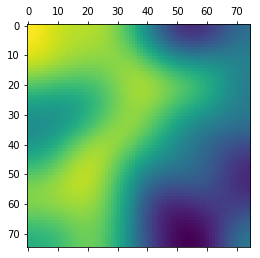

In [51]:
import matplotlib.pyplot as plt
plt.matshow(img_development[:,2100].reshape(p['size'])[:,:,1])

In [59]:
img_development.shape


(11250, 10001)

In [60]:
75*75*2

11250